# `AA Workshop 5` — Coding Challenge

Complete the tasks below to practice implementing regression modeling from `W5_Regression_Basics.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- running linear regressions with `scikit-learn` using a single or multiple features
- visualizing regression outputs
- comparing training error metrics

## Data

For all following tasks, you will work on the same dataset of ridehailing trips from New York City for a single day (August 1st, 2025). The provided dataset is a subset of the data published by the New York City Taxi & Limousine Commission, which is publicly available [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Load the data (which can be found in the `data`-folder). Then, restrict our sample to trips with a distance of up to 10 miles and a duration of up to 100 minutes. Finally, inspect the data.

In [1]:
# your code here


import pandas as pd

trips = pd.read_csv("../data/ridehailing_NYC_20250801.csv")

# restrict to trips up to 10 miles & 100 minutes
trips = trips[(trips.trip_miles <= 10) & (trips.trip_minutes <= 100)].copy()

trips.head()

,request_datetime,pickup_datetime,dropoff_datetime,trip_miles,trip_minutes,base_passenger_fare,provider
0,2025-08-01 00:07:01,2025-08-01 00:09:29,2025-08-01 00:22:28,1.5,13,44.43,uber
1,2025-08-01 00:31:28,2025-08-01 00:35:50,2025-08-01 00:46:56,2.1,11,22.20,uber
2,2025-08-01 00:53:16,2025-08-01 00:56:55,2025-08-01 01:18:05,3.0,21,24.81,uber
3,2025-08-01 00:52:57,2025-08-01 00:56:10,2025-08-01 01:02:18,1.3,6,15.15,uber
4,2025-08-01 00:06:10,2025-08-01 00:09:44,2025-08-01 00:26:07,8.3,16,22.84,uber


In [2]:
trips.describe()

,trip_miles,trip_minutes,base_passenger_fare
count,589053.000000,589053.000000,589053.000000
mean,3.343068,16.606528,20.156269
std,2.401975,9.536857,11.864171
min,0.000000,0.000000,-8.370000
25%,1.400000,9.000000,11.660000
50%,2.600000,15.000000,17.050000
75%,4.700000,22.000000,25.310000
max,10.000000,99.000000,193.760000


## Task 1 - Predicting Ridehailing Fares in NYC

Use `scikit-learn` to run a linear regression to predict the `base_passenger_fare` based on `trip_miles`. Then, generate a scatter plot of the observed and predicted values.

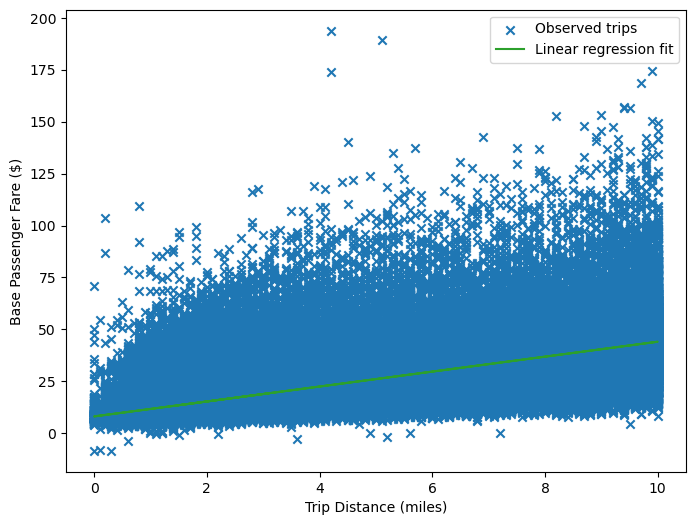

In [3]:
# your code here


import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initialize model
model_task1 = LinearRegression(fit_intercept=True)

# train
model_task1.fit(trips["trip_miles"].values.reshape((-1,1)), trips["base_passenger_fare"])

# generate predictions for original data
model_task1_pred = model_task1.predict(trips["trip_miles"].values.reshape(-1,1))

# plot regression line
fig,ax = plt.subplots(figsize = (8,6))
ax.scatter(trips["trip_miles"], trips["base_passenger_fare"], marker="x", label='Observed trips')
ax.set_xlabel("Trip Distance (miles)")
ax.set_ylabel("Base Passenger Fare ($)")
ax.plot(trips["trip_miles"], model_task1_pred, c='C2', label='Linear regression fit')
ax.legend()
plt.show()

## Task 2 - Distance or Duration?

Which feature is the better predictor of the fare: distance or duration? Compare the mean absolute error on the training set of regression models using `trip_miles` and `trip_minutes` as single predictors, respectively.

In [4]:
# your code here


from sklearn.metrics import mean_absolute_error

# model: trip_miles
## see model from task 1

## MAE
print("MAE distance model:", round(mean_absolute_error(trips["base_passenger_fare"], model_task1_pred),2),"$")

# model: trip_minutes
## train model
model_task2 = LinearRegression(fit_intercept=True)
model_task2.fit(trips["trip_minutes"].values.reshape((-1,1)), trips["base_passenger_fare"])

## generate predictions
model_task2_pred = model_task2.predict(trips["trip_minutes"].values.reshape(-1,1))

## MAE
print("MAE duration model:", round(mean_absolute_error(trips["base_passenger_fare"], model_task2_pred),2),"$")

MAE distance model: 5.23 $
MAE duration model: 4.96 $


## Task 3 - Uber vs. Lyft

Our dataset also contains information on the provider of each trip, namely Uber or Lyft. Can we use this feature to improve our predictions of the passenger fare? Run a regression using both `trip_minutes` and `provider` as features. Calculate the mean absolute error on the training set, and generate a scatter plot including the regression lines for each provider in different colors.

MAE: 4.96 $


C:\Users\micha\anaconda3\envs\AA_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


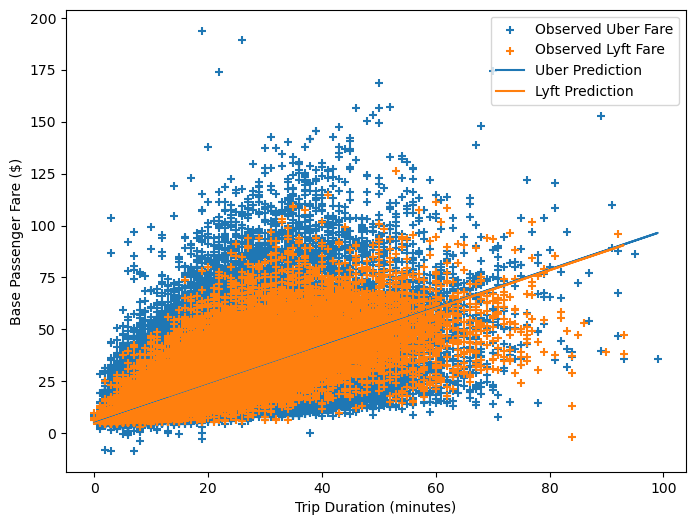

In [5]:
# your code here


# recode provider feature
trips["provider_num"] = (trips["provider"] == "uber").astype(int)

# model
## train model
model_task3 = LinearRegression(fit_intercept=True)
model_task3.fit(trips[["trip_minutes", "provider_num"]], trips["base_passenger_fare"])

## generate predictions
model_task3_pred = model_task3.predict(trips[["trip_minutes", "provider_num"]])

## MAE
print("MAE:", round(mean_absolute_error(trips["base_passenger_fare"], model_task3_pred),2),"$")

# plot
## create two feature vectors for uber and lyft
X_uber = trips[trips["provider_num"]==1].copy()
X_lyft = trips[trips["provider_num"]==0].copy()

## predict uber and lyft separately (using the same model!)
y_pred_uber = model_task3.predict(X_uber[["trip_minutes", "provider_num"]])
y_pred_lyft = model_task3.predict(X_lyft[["trip_minutes", "provider_num"]])

## plot
plt.figure(figsize = (8,6))
plt.scatter(X_uber["trip_minutes"], 
            X_uber["base_passenger_fare"], 
            marker="+",
            label="Observed Uber Fare")

plt.scatter(X_lyft["trip_minutes"], 
            X_lyft["base_passenger_fare"], 
            marker="+",
            label="Observed Lyft Fare")

plt.plot(X_uber["trip_minutes"], 
         y_pred_uber,
         label="Uber Prediction")

plt.plot(X_lyft["trip_minutes"], 
         y_pred_lyft,
         label="Lyft Prediction")

plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Base Passenger Fare ($)")
plt.legend()
plt.show()